
# Esercitazione:

Analisi del numero ottimale di punti erogativi per la distribuzione di farmaci orali oncologici allo scopo di ridurre e omogeneizzare il burden of travel per il paziente

 ## NUOVO

In [89]:
#Import library
import pandas as pd
import numpy as np                                # For data management
import pandas as pd                               # For data management
import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization
from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
from sklearn.cluster import KMeans                # To instantiate, train and use model
from sklearn import metrics                       # For Model Evaluation
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import geopy.distance
import random
from PIL import Image, ImageDraw
from operator import index
import itertools
import matplotlib.animation as animation
import collections

In [90]:
!git clone https://github.com/IRST-Data-Unit/EsercitazioneRagazzeDigitali/

fatal: destination path 'EsercitazioneRagazzeDigitali' already exists and is not an empty directory.


In [134]:
path = '/content/EsercitazioneRagazzeDigitali/fed.csv'
dataframe_raw = pd.read_csv(path, sep=',')
# Convert the 'column_name' column from string to float
dataframe_raw['Latitudine'] = pd.to_numeric(dataframe_raw['Latitudine'].str.replace(',','.'))
dataframe_raw['Longitudine'] = pd.to_numeric(dataframe_raw['Longitudine'].str.replace(',','.'))

In [135]:
dataframe_raw

,Comune,Latitudine,Longitudine,# Pazienti,# Accessi,Popolazione
0,ALFONSINE,44.50590,12.04307,68,721,11722
1,BAGNACAVALLO,44.41974,11.97668,118,1188,16579
2,BAGNARA DI ROMAGNA,44.38951,11.82485,18,174,2427
3,BAGNO DI ROMAGNA,43.83911,11.96561,39,339,5746
4,BELLARIA-IGEA MARINA,44.13436,12.46672,97,1122,19373
...,...,...,...,...,...,...
68,SOLAROLO,44.35681,11.83216,20,205,4486
69,TALAMELLO,43.91052,12.28341,10,45,1076
70,TREDOZIO,44.08612,11.74841,13,146,1149
71,VERGHERETO,43.79333,12.00400,8,60,1788


In [136]:
#Initialize variable
color_array=[]
lat_array =[]
lon_array=[]
xc_array=[]
yc_array=[]
city_c_array=[]
dist_array = []
label_array= []
pop_com_array = []
#Forlì, Cesena, Ravenna, Rimini
#long
y_fixed =[12.0537,12.249722,12.1965711,12.580833]
#lat
x_fixed =[44.2228,44.143333,44.4157307,44.063333]


In [137]:
k_num = [4]

In [138]:
geolocator = Nominatim(user_agent="rd")
statistisc = pd.DataFrame()

In [139]:
k = 4

In [140]:
dataframe

,Latitudine,Longitudine,cluster,Comune,city_cluster,latc,lonc,dist,accessi,color
0,44.50590,12.04307,2,ALFONSINE,City:Ravenna|SubUrb:Piangipane|Province:-,44.425732,12.08873,10.084471,721,#AD69E4
1,44.41974,11.97668,2,BAGNACAVALLO,City:Ravenna|SubUrb:Piangipane|Province:-,44.425732,12.08873,12.412384,1188,#AD69E4
2,44.38951,11.82485,0,BAGNARA DI ROMAGNA,City:Forlì|SubUrb:Rovere|Province:Forlì-Cesena,44.209162,11.970658,25.420354,174,#FA6C60
3,43.83911,11.96561,0,BAGNO DI ROMAGNA,City:Forlì|SubUrb:Rovere|Province:Forlì-Cesena,44.209162,11.970658,40.308257,339,#FA6C60
4,44.13436,12.46672,1,BELLARIA-IGEA MARINA,City:Gambettola|SubUrb:-|Province:Forlì-Cesena,44.111244,12.33107,15.215353,1122,#90B8DE
...,...,...,...,...,...,...,...,...,...,...
68,44.35681,11.83216,0,SOLAROLO,City:Forlì|SubUrb:Rovere|Province:Forlì-Cesena,44.209162,11.970658,22.213924,205,#FA6C60
69,43.91052,12.28341,1,TALAMELLO,City:Gambettola|SubUrb:-|Province:Forlì-Cesena,44.111244,12.33107,22.461902,45,#90B8DE
70,44.08612,11.74841,0,TREDOZIO,City:Forlì|SubUrb:Rovere|Province:Forlì-Cesena,44.209162,11.970658,28.003116,146,#FA6C60
71,43.79333,12.00400,0,VERGHERETO,City:Forlì|SubUrb:Rovere|Province:Forlì-Cesena,44.209162,11.970658,45.437283,60,#FA6C60


In [155]:
#Initialize variable
color_array=[]
lat_array =[]
lon_array=[]
xc_array=[]
yc_array=[]
city_c_array=[]
dist_array = []
label_array= []
pop_com_array = []
#Forlì, Cesena, Ravenna, Rimini
#long
y_fixed =[12.0537,12.249722,12.1965711,12.580833]
#lat
x_fixed =[44.2228,44.143333,44.4157307,44.063333]
dataframe = dataframe_raw[['Latitudine','Longitudine']]
kmeans_model = KMeans(n_clusters = k)
weight = dataframe_raw['# Pazienti']
kmeans_model.fit(dataframe,sample_weight=weight)
centroids = kmeans_model.cluster_centers_
dataframe["cluster"] = kmeans_model.labels_

#MATCHING CITY NAME
df_cluster = pd.DataFrame(columns=['long','lat','city'])
for p in centroids:
  c= ''
  location = geolocator.reverse(str(p[0])+","+str(p[1]))
  address = location.raw['address']
  city = address.get('city', '')
  town = address.get('town', '')
  state = address.get('state', '')
  country = address.get('country', '')
  village =address.get('village', '')
  county = address.get('county', '')
  neighbourhood = address.get('neighbourhood', '')
  province = address.get('province', '')
  suburb = address.get('suburb', '')
  c='City:' +(town or city  or county) +'|'+'SubUrb:'+ ( village or neighbourhood or suburb or '-')+'|'+'Province:' + (province or '-').strip()
  new_row = {'long':p[1],'lat':p[0],'city':c}
  df_cluster = df_cluster.append(new_row,ignore_index=True)

dataframe["Comune"] = dataframe_raw['Comune']
dataframe["city_cluster"] = " "
dataframe["latc"] = " "
dataframe["lonc"] = " "
dataframe["dist"] = " "
dataframe["coordinates"] = " "
dataframe["accessi"] = dataframe_raw['# Accessi']
for i in range (0,k):
  dataframe.loc[dataframe['cluster'] == i, 'city_cluster'] = df_cluster['city'][i]
  dataframe.loc[dataframe['cluster'] == i, 'latc'] = df_cluster['lat'][i]
  dataframe.loc[dataframe['cluster'] == i, 'lonc'] = df_cluster['long'][i]
for index in range(len(dataframe)):
  tupla_origin = (float(dataframe['Longitudine'][index]),float(dataframe['Latitudine'][index]))
  tupla_fin = (float(dataframe['lonc'][index]),float(dataframe['latc'][index]))
  dataframe['dist'][index] = geopy.distance.geodesic(tupla_origin, tupla_fin).km

colors  = []
color_dict = {}
for c in range(0,k):
  r = lambda: random.randint(0,255)
  colors.append('#%02X%02X%02X' % (r(),r(),r()))
  color_dict[c] = colors[c]
  for c in range(0,k):
    dataframe['color']=dataframe['cluster'].map(color_dict)

acc = dataframe_raw['# Accessi']
color_array.append(dataframe['color'])
lat_array.append(dataframe['Latitudine'])
lon_array.append(dataframe['Longitudine'])
xc_array.append(df_cluster['lat'])
yc_array.append(df_cluster['long'])
city_c_array.append(df_cluster['city'])
dist_array.append(dataframe['dist'])

print(f'K:'+ str(k))
statistisc['max_dist_intraclu'] = dataframe.groupby('cluster')['dist'].apply(lambda x: x.max()).reset_index(name='count')['count']
statistisc['min_dist_intraclu'] = dataframe.groupby('cluster')['dist'].apply(lambda x: x.min()).reset_index(name='count')['count']
label_array.append(np.array(dataframe['cluster']))

statistisc.to_csv(f'/content/statistic_{k}_dist.csv')

K:4


In [103]:
# set parameters

frames = len(k_num)

In [142]:
color_array

[0     #AD4D76
 1     #AD4D76
 2     #573987
 3     #573987
 4     #8F7092
        ...   
 68    #573987
 69    #8F7092
 70    #573987
 71    #573987
 72    #8F7092
 Name: color, Length: 73, dtype: object]

# Visualizziamo la distribuzione del numero di centroidi scelti.

In [143]:
color_array

[0     #AD4D76
 1     #AD4D76
 2     #573987
 3     #573987
 4     #8F7092
        ...   
 68    #573987
 69    #8F7092
 70    #573987
 71    #573987
 72    #8F7092
 Name: color, Length: 73, dtype: object]

In [109]:
lon_array

[0     12.04307
 1     11.97668
 2     11.82485
 3     11.96561
 4     12.46672
         ...   
 68    11.83216
 69    12.28341
 70    11.74841
 71    12.00400
 72    12.42245
 Name: Longitudine, Length: 73, dtype: float64]

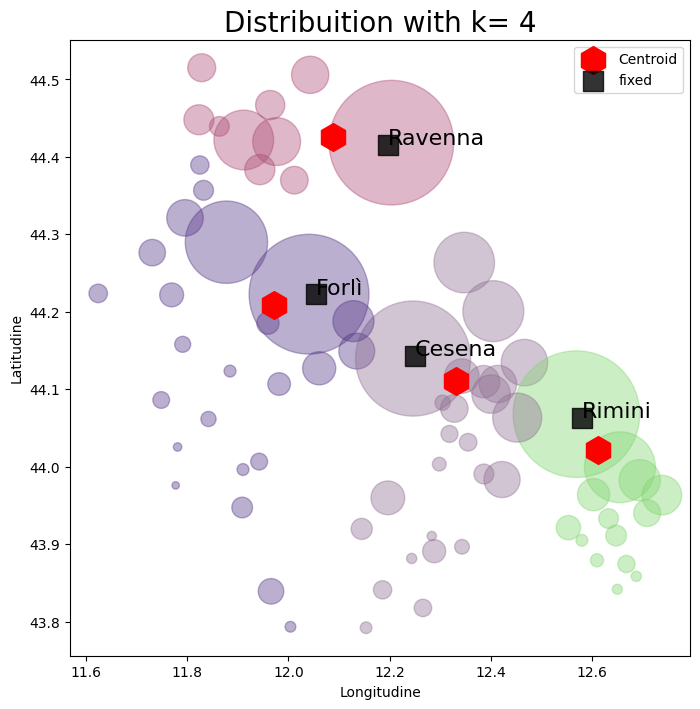

In [144]:
fig, ax = plt.subplots(figsize=(8,8))
# clear the axis each frame
ax.clear()
ax.set_title('Distribuition with k= {}'.format(k),
              fontdict={'fontsize':20})
# replot things
ax.scatter(x = lon_array, y = lat_array, s=acc,
            c=color_array[0],alpha=0.4)
#Centroids
ax.scatter(yc_array, xc_array, c='red',
            s=400,marker='h',label='Centroid')
#Fixed city
ax.scatter(y_fixed, x_fixed, c='black', s=200,
            alpha=0.8,marker='s',label='fixed')
ax.annotate('Forlì',(y_fixed[0],x_fixed[0]),fontsize=16)
ax.annotate('Cesena',(y_fixed[1],x_fixed[1]),fontsize=16)
ax.annotate('Ravenna',(y_fixed[2],x_fixed[2]),fontsize=16)
ax.annotate('Rimini',(y_fixed[3],x_fixed[3]),fontsize=16)
ax.set_xlabel('Longitudine')
ax.set_ylabel('Latitudine')
ax.legend()

# Dove si trovano i punti identificat?

In [156]:
#Statistics
tmp = pd.DataFrame()
min_dist = []
stat_df =pd.DataFrame()
km_perc = []
city = []
tmp_max = []
util_statistics = pd.DataFrame()
for index,k in enumerate(k_num):
  tmp_max.append(max(dist_array[index]))
  km_perc.append(sum(dist_array[index]*acc))

util_statistics['cluster'] = k_num
util_statistics['general_max_dist'] = tmp_max
util_statistics['somma_km_percorsi'] = km_perc
util_statistics.to_csv('/content/util_statistics.csv')

In [162]:
from matplotlib.cbook import index_of
city_def = []
num_comuni_def = []
for index,k in enumerate(k_num):
  print(k)
  statistisc = pd.DataFrame()
  tmp = city_c_array[index]
  city_tmp = []
  num_comuni_def=collections.Counter(label_array[index])
  num_comuni = []
  dataframe_raw['cluster'] = label_array[index]
  for indice, name in enumerate(tmp):
    #print(name)
    if('City:|' in name):
     city= name.split('SubUrb:')[1].split('|')[0]
    else:
     city= name.split('City:')[1].split('|')[0]
    num_comuni.append(num_comuni_def.get(indice))
    city_tmp.append(city+' ('+str(xc_array[index][indice])+','+str(yc_array[index][indice])+')')


  statistisc['city'] = city_tmp
  statistisc['num_comuni'] = num_comuni
  statistisc['popolazione_cluster'] = round(dataframe_raw.groupby('cluster')['Popolazione'].apply(lambda x: x.sum()).reset_index(name='count')['count'])
  statistisc['paz_assist'] = dataframe_raw.groupby('cluster')['# Pazienti'].apply(lambda x: x.sum()).reset_index(name='count')['count']
  statistisc['accessi_medi_anno'] = round((dataframe_raw.groupby('cluster')['# Accessi'].apply(lambda x: x.sum()).reset_index(name='count')['count'])/3)
  statistisc['accessi_medi_settimana'] = round((dataframe_raw.groupby('cluster')['# Accessi'].apply(lambda x: x.sum()).reset_index(name='count')['count'])/156)
  statistisc.to_csv(f'/content/statistic_{k}.csv')

print(statistisc['city'])

4
0         Forlì (44.20916218192628,11.970658216409037)
1        Rimini (44.02106131136951,12.612485264857881)
2      Ravenna (44.425732369109944,12.088729685863875)
3    Gambettola (44.11124433638444,12.331070491990847)
Name: city, dtype: object


EXTRA

In [132]:
!pip install pydeck

In [161]:
"""
ScatterplotLayer
================

Plot of the number of exits for various subway stops within San Francisco, California.

Adapted from the deck.gl documentation.
"""

import pydeck as pdk
import pandas as pd
import math

#SCATTERPLOT_LAYER_DATA = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/website/bart-stations.json"
#df = pd.read_json(SCATTERPLOT_LAYER_DATA)
dataframe['exits_radius'] = ""
dataframe["exits_radius"] = dataframe["accessi"].apply(lambda exits_count: math.sqrt(exits_count))
for index, row in dataframe.iterrows():
  dataframe['coordinates'][index] = [row['Longitudine'],row['Latitudine']]
# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    dataframe,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position="coordinates",
    get_radius="exits_radius",
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=44.263550, longitude=12.347682, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{name}\n{address}"})
r.to_html("scatterplot_layer.html")

<IPython.core.display.Javascript object>